In [1]:
import pandas as pd
from itertools import combinations
from statistics import mean, pstdev, stdev
import matplotlib.pyplot as plt
import numpy as np

# Create the data of the companies

In [2]:
df = pd.read_excel('Worksheets for calculations.xlsx',sheet_name='Visualize CLT')
trunc_df = df.head(20)
df.head()

Person names  Person age
0           P1          65
1           P2           6
2           P3          46
3           P4          23
4           P5          46

# Create combinations by taking n persons at a time

In [3]:
n_taken_at_a_time = 5
combination_of_companies = combinations(trunc_df['Person names'],n_taken_at_a_time)
combination_of_companies = list(combination_of_companies)
print('Total Combinations: {}'.format(len(combination_of_companies)))

Total Combinations: 15504


# Store the mean of samples

In [4]:
mean_ages_of_samples = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_ages_of_samples.append(mean(sample_ages))

# Distribution of population age

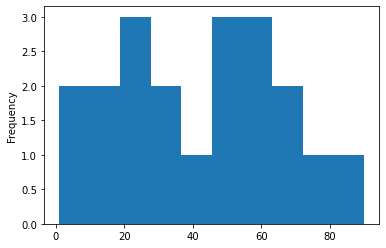

In [5]:
trunc_df['Person age'].plot.hist()

# Distributions of sample means

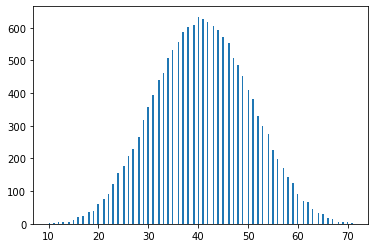

In [6]:
plt.hist(mean_ages_of_samples,bins=200)
plt.show()

# Population Mean and Standard deviation

In [7]:
pop_mean = mean(trunc_df['Person age'].values)
pop_sd = pstdev(trunc_df['Person age'].values)
print('Population mean = {}'.format(pop_mean))
print('Population sd = {}'.format(pop_sd))

Population mean = 41
Population sd = 24.06241883103193


# Mean and Standard deviation of sample means

In [8]:
print('Mean of sample means: {}'.format(mean(mean_ages_of_samples)))
print('Standard deviation of mean ages of samples {}'.format(pstdev(mean_ages_of_samples)))

Mean of sample means: 40
Standard deviation of mean ages of samples 9.539392014169456


# Relationship with population standard deviation

In [9]:
pstdev(mean_ages_of_samples)*n_taken_at_a_time**0.5

21.330729007701542

# Observations and Inferences
 - Mean of sample means = mean of population
 - Also note that none of the sample mean is equal to the population mean. So suppose out of the population we take a sample it is least likely that the given sample's mean = population mean.
 - Standard deviation of sample means is a scaled version of Population standard deviations by a factor of sqrt(number of samples)
 - The distribution of sample means follow a normal distribution and the population distribution doesn't really matter. It can follow any horrible distribution it may like.

In [10]:
def generate_random_samples(population_array: list,
                            sample_size:int=30) -> list:
    '''
    Given an array like object return some random samples of size = sample_size
    '''
    random_sample_indices = np.random.randint(low=0,high=len(population_array), size=sample_size)
    random_samples = []
    for indices in random_sample_indices:
        random_samples.append(population_array[indices])
    return random_samples

# Confidence Interval using Z statistics
Take a random sample of size large enough for CLT to be applicable (Typically 30), given population standard deviation σ, number of samples = n, sample mean = X_bar estimate the range of values within which population mean is going to lie

In [11]:
from scipy.stats import norm, t

In [12]:
population_mean = round(mean(df['Person age']),3)
sample_size = 30
random_samples = generate_random_samples(population_array=df['Person age'].tolist(), sample_size=sample_size)
sample_mean = mean(random_samples)
population_std_dev = pstdev(df['Person age'].tolist())
sample_std_dev = population_std_dev/sample_size**0.5
confidence_interval = 0.90
prob_high = (1+confidence_interval)/2
prob_low = (1-confidence_interval)/2
x_high = round(norm.ppf(prob_high,loc=sample_mean,scale=sample_std_dev),3)
x_low = round(norm.ppf(prob_low,loc=sample_mean,scale=sample_std_dev),3)
print('With {}% confidence population mean is going to lie within {}'.format(confidence_interval*100, tuple([x_low,x_high])))
print('Actual population mean = {}'.format(population_mean))

With 90.0% confidence population mean is going to lie within (43.745, 61.255)
Actual population mean = 48.743


# What is the Random Variable?
An important concept to understand here what is the random variable. Suppose we take another random sample of the same size. Its mean will be changed. Accordingly the given range will also change. What confidence interval gives is the probability that if we take the different samples how many times the calculated range will contain population mean?<br><br>
Below we will take samples of size 30, 10000 times and find out how many times the ranges calculated will contain population mean. For better understanding we will decrease the confidence interval to 60%

In [13]:
def what_is_random_var(confidence_interval = 0.60,
                       iterations = 1000):
    times_range_contains_mu = 0;
    for i in range(0,iterations):
        sample_size = 30
        random_samples = generate_random_samples(population_array=df['Person age'].tolist(), 
                                                 sample_size=sample_size)
        sample_mean = mean(random_samples)
        population_std_dev = pstdev(df['Person age'].tolist())
        sample_std_dev = population_std_dev/sample_size**0.5
        prob_high = (1+confidence_interval)/2
        prob_low = (1-confidence_interval)/2
        x_high = round(norm.ppf(prob_high,loc=sample_mean,scale=sample_std_dev),3)
        x_low = round(norm.ppf(prob_low,loc=sample_mean,scale=sample_std_dev),3)

        #check whether population mean lies within the calculated ranges
        if x_low <= population_mean <= x_high:
            # increment the counter
            times_range_contains_mu+=1
        else:
            pass
    print('Number of times the ranges contain population mean = {}'.format(times_range_contains_mu))

In [14]:
what_is_random_var(confidence_interval = 0.60,
                   iterations = 1000
                  )

Number of times the ranges contain population mean = 600


In [17]:
what_is_random_var(confidence_interval = 0.75,
                   iterations = 100
                  )

Number of times the ranges contain population mean = 74


In [16]:
what_is_random_var(confidence_interval = 0.935,
                   iterations = 10000
                  )

Number of times the ranges contain population mean = 9326


<b>Inference:</b> The above experiment shows that no matter how many times we do the samplings number of times the calculated ranges will contain population mean = confidence interval x no. of sampling iterations